In [177]:
import pandas as pd
import numpy as np

In [178]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [179]:
mask = train_df["Episode_Length_minutes"].isna()
train_df = train_df[~mask]
ep_len = train_df["Episode_Length_minutes"].values
y = train_df["Listening_Time_minutes"].values
ep_len, y

(array([119.8 ,  73.9 ,  67.17, ...,  30.98, 108.98,  24.1 ],
       shape=(662907,)),
 array([ 88.01241,  44.92531,  46.27824, ...,  15.26   , 100.72939,
         11.94439], shape=(662907,)))

## Line fit

In [180]:
m = np.dot(ep_len, y) / np.dot(ep_len, ep_len)
print(f"m: {m}")

m: 0.7192500229582935


In [181]:
b = np.mean(y) - m * np.mean(ep_len)
print(f"b: {b}")

b: -0.657047138824602


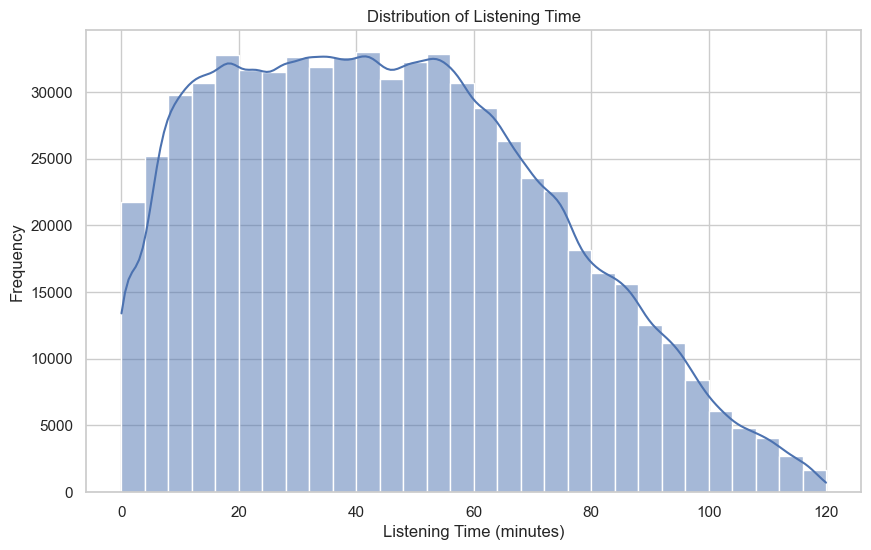

In [182]:
# Plot the target distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train_df["Listening_Time_minutes"], bins=30, kde=True)
plt.title("Distribution of Listening Time")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [183]:
train_df["Listening_Time_minutes_bin"] = pd.qcut(train_df['Listening_Time_minutes'], q=5, labels=False, duplicates='drop')
train_df["Episode_Length_minutes_bin"] = pd.qcut(train_df['Episode_Length_minutes'], q=50, labels=False, duplicates='drop')
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Time_minutes_bin,Episode_Length_minutes_bin
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,4,49
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,2,29
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,2,26
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,4,45
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,3,29
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,2,29
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,0,9
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,4,44


In [184]:
# Clean up the Podcast_Name column
train_df["Podcast_Name"] = train_df["Podcast_Name"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)
train_df["Podcast_Name"] = train_df["Podcast_Name"].str.replace(r"\s+", " ", regex=True).str.strip()

# Split Podcast_Name into two columns
train_df["Podcast_Name_1"] = train_df['Podcast_Name'].str.split(' ', expand=True)[0]
train_df["Podcast_Name_2"] = train_df['Podcast_Name'].str.split(' ', expand=True)[1]

# Fill missing values in Podcast_Name_2 with "Unknown"
train_df["Podcast_Name_1"] = train_df["Podcast_Name_1"].fillna("Unknown")
train_df["Podcast_Name_2"] = train_df["Podcast_Name_2"].fillna("Unknown")


train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Time_minutes_bin,Episode_Length_minutes_bin,Podcast_Name_1,Podcast_Name_2
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,4,49,Joke,Junction
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,2,29,Study,Sessions
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,2,26,Digital,Digest
4,4,Mind Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,4,45,Mind,Body
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047,1,7,Fitness,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,3,29,Learning,Lab
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,2,29,Business,Briefs
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,0,9,Lifestyle,Lounge
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,4,44,Style,Guide


In [185]:
train_df["Number_of_Ads"] = train_df["Number_of_Ads"].fillna(0)

In [186]:
# Turning some columns into categorical
columns_to_categorical = ["Podcast_Name", "Podcast_Name_1", "Podcast_Name_2", "Genre", "Episode_Title", "Publication_Day", "Publication_Time", "Episode_Sentiment", "Number_of_Ads", "Episode_Length_minutes_bin"]
for col in columns_to_categorical:
    train_df[col] = train_df[col].astype("category")
    train_df[col] = train_df[col].cat.codes 

In [187]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Time_minutes_bin,Episode_Length_minutes_bin,Podcast_Name_1,Podcast_Name_2
1,1,24,19,119.80,1,66.95,2,0,75.95,2,0,88.01241,4,49,23,21
2,2,40,8,73.90,2,69.97,5,1,8.97,0,0,44.92531,2,29,38,34
3,3,10,40,67.17,8,57.22,1,2,78.70,2,2,46.27824,2,26,9,11
4,4,31,85,110.51,3,80.07,1,0,58.68,3,1,75.61031,4,45,30,2
5,5,14,11,26.54,3,48.96,2,0,NaN,3,2,22.77047,1,7,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,26,18,75.66,2,69.36,2,2,NaN,0,0,56.87058,3,29,25,22
749996,749996,2,14,75.75,0,35.21,2,3,NaN,2,1,45.46242,2,29,2,4
749997,749997,28,47,30.98,4,78.58,4,2,84.89,0,0,15.26000,0,9,27,26
749998,749998,41,42,108.98,4,45.39,4,2,93.27,0,0,100.72939,4,44,39,17


In [188]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

X = train_df[["Podcast_Name", "Genre", "Episode_Title", "Publication_Day", "Publication_Time", "Episode_Sentiment", "Episode_Length_minutes_bin"]]
# X = train_df[["Episode_Length_minutes_bin"]]
y = train_df["Listening_Time_minutes_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6370799454928522
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     40073
           1       0.64      0.61      0.63     39704
           2       0.55      0.53      0.54     39706
           3       0.49      0.41      0.44     39757
           4       0.64      0.83      0.72     39633

    accuracy                           0.64    198873
   macro avg       0.63      0.64      0.63    198873
weighted avg       0.63      0.64      0.63    198873



In [147]:
model.predict_proba(X_test)

array([[4.04204798e-05, 2.96261973e-03, 5.51053071e-02, ...,
        7.22164925e-03, 1.79827667e-05, 3.54040807e-05],
       [9.80398908e-02, 5.12847594e-01, 3.58527010e-01, ...,
        1.78561000e-05, 1.99253082e-04, 3.71490276e-05],
       [2.11994429e-05, 1.73901178e-05, 1.37063594e-04, ...,
        2.05577325e-01, 3.12099341e-01, 1.11758836e-01],
       ...,
       [2.82125747e-05, 2.70289596e-05, 6.96174436e-05, ...,
        2.01958641e-01, 2.11679955e-01, 4.30241559e-01],
       [1.67750594e-05, 2.05082046e-05, 2.09246875e-05, ...,
        1.54119389e-01, 2.26436070e-01, 5.11213203e-01],
       [1.85496853e-05, 1.88638525e-05, 7.06839305e-04, ...,
        2.59600063e-01, 2.14585076e-01, 7.06394680e-03]],
      shape=(198873, 10))